In [1]:
import sys
sys.path.append("../..")

import Beam
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## System settings

In [2]:
Nx = 200
Ny = 200

dx = 1.0*10**-6
dy = 1.0*10**-6
Lx = dx*Nx
Ly = dy*Ny
delta = 100.0*10**-6
n0 = 1.45
k0 = 2.0*np.pi/(633.0*10**-9)

Z = 30.0*10**-3

## Define the dielectric function

In [3]:
def dn(z):
    x = np.linspace(-Nx/2,Nx/2,Nx)
    y = np.linspace(-Ny/2,Ny/2,Ny)
    x,y = np.meshgrid(x,y)

    R = Nx/4
    delta = Nx/13

    dn =  np.exp(-((x - R)**2 + (y)**2)/(delta**2)) \
        + np.exp(-((x + R)**2 + (y)**2)/(delta**2)) \
        + np.exp(-((x - R*np.cos(np.pi/3))**2 + (y - R*np.sin(np.pi/3))**2)/(delta**2)) \
        + np.exp(-((x + R*np.cos(np.pi/3))**2 + (y - R*np.sin(np.pi/3))**2)/(delta**2)) \
        + np.exp(-((x - R*np.cos(np.pi/3))**2 + (y + R*np.sin(np.pi/3))**2)/(delta**2)) \
        + np.exp(-((x + R*np.cos(np.pi/3))**2 + (y + R*np.sin(np.pi/3))**2)/(delta**2)) 
    #return 7.0*10**-4*dn
    return dn

## Define the initial field distribution

In [4]:
x = np.linspace(0,Lx,Nx)
y = np.linspace(0,Ly,Ny)
x,y = np.meshgrid(x,y)
    
initfield = np.exp(-((x-Lx/2)**2+(y-Ly/2)**2)/(delta**2))

## Perform the BPM calculation

In [5]:
bpm = Beam.BPM3rd(n0=n0,k0=k0,dx=dx,dy=dy,Nx=Nx,Ny=Ny,dn=dn,verbose=True) 

Initiating the H0...Done!


In [ ]:
fields = bpm.calculate(zs=[0, Z],field0=initfield, vectorized=True, verbose=True)

Perform the ODE solver with the method [RK45]...

## Plot the result

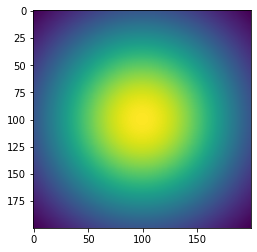

In [15]:
field = fields[-1]
plt.imshow(np.real(field))
plt.show()